In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Background readings
* Coarse gain: x10
* Fine gain: just under 12.5
* Integrate: 200 ns
* Diff: 500 ns

In [8]:
bin_arr = []
energy_arr = []

Text(0.5, 1.0, 'Background')

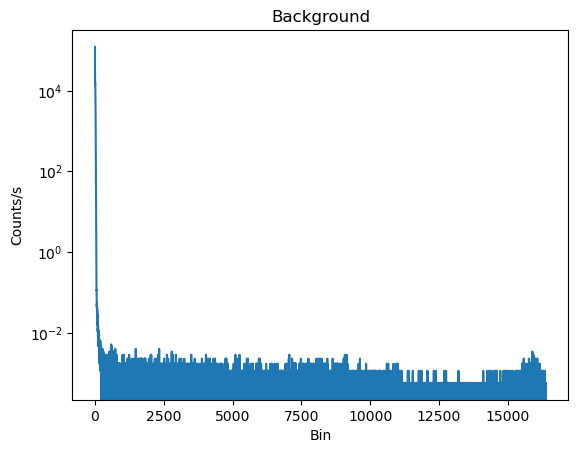

In [14]:
filepath = 'data/background_x10.csv'
duration = 1763  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

bg_ch = df['ch']  # bin
bg_n = df['n'] / duration  # counts/s

plt.plot(bg_ch, bg_n)
plt.xlabel('Bin')
plt.ylabel('Counts/s')
plt.yscale('log')
plt.title('Background')

## Sample 1: Cs-137
Peak corresponds to 662 keV.

Bin 5247 corresponds to 662 keV


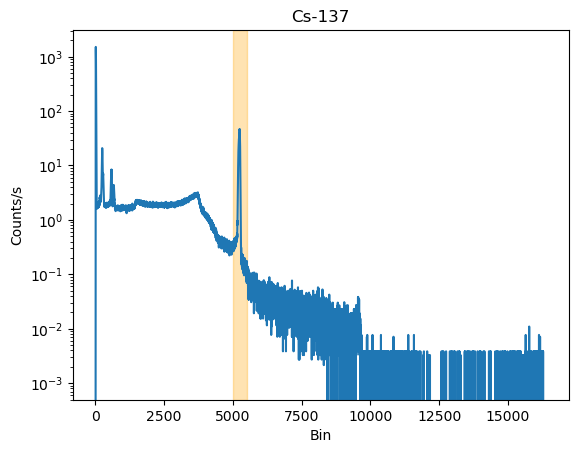

In [15]:
filepath = 'data/cs137_x10.csv'
duration = 260  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

ch = df['ch']  # bin
n = df['n'] / duration - bg_n# counts/s

plt.plot(ch, n)
plt.xlabel('Bin')
plt.ylabel('Counts/s')
plt.yscale('log')
plt.title('Cs-137')

lower_idx = 5000
upper_idx = 5500

y = n[lower_idx:upper_idx]
amax = np.amax(y)
index = y.argmax() + lower_idx

plt.axvspan(ch[lower_idx], ch[upper_idx], color="orange", alpha=0.3)
# plt.axhline(amax, color="coral")
# plt.axvline(index, color="coral")

print(f'Bin {index} corresponds to 662 keV')
bin_arr.append(index)
energy_arr.append(662)

# Sample 2: Am-241
Peak expected at 59 keV

Bin 475 corresponds to 59 keV


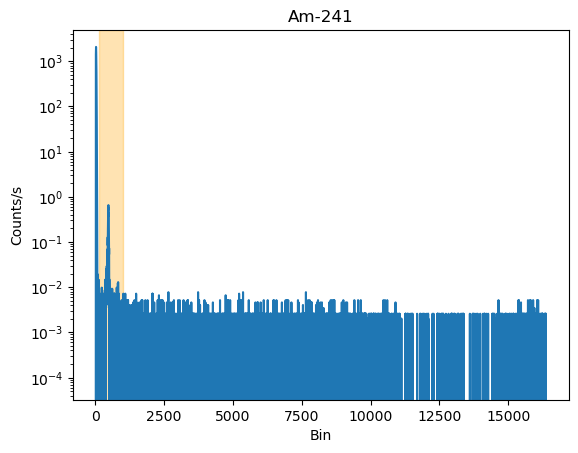

In [16]:
filepath = 'data/am241_x10.csv'
duration = 386  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

ch = df['ch']  # bin
n = df['n'] / duration - bg_n # counts/s

plt.plot(ch, n)
plt.xlabel('Bin')
plt.ylabel('Counts/s')
plt.yscale('log')
plt.title('Am-241')

lower_idx = 150
upper_idx = 1000

y = n[lower_idx:upper_idx]
amax = np.amax(y)
index = y.argmax() + lower_idx

plt.axvspan(ch[lower_idx], ch[upper_idx], color="orange", alpha=0.3)
# plt.axhline(amax, color="coral")
# plt.axvline(index, color="coral")

print(f'Bin {index} corresponds to 59 keV')
bin_arr.append(index)
energy_arr.append(59)

# Sample 3: Ba-133 RETAKE THIS
Peaks expected at 31 keV and 356 keV

In [ ]:
filepath = 'data/ba133_x10.csv'
duration = 115  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

ch = df['ch']  # bin
n = df['n'] / duration - bg_n # counts/s

plt.plot(ch, n)
plt.xlabel('Bin')
plt.ylabel('Counts/s')
plt.yscale('log')

lower_idx = 150
upper_idx = 1000

y = n[lower_idx:upper_idx]
amax = np.amax(y)
index = y.argmax() + lower_idx

plt.axvspan(ch[lower_idx], ch[upper_idx], color="orange", alpha=0.3)
# plt.axhline(amax, color="coral")
# plt.axvline(index, color="coral")

print(f'Bin {index} corresponds to 59 keV')

Text(0.5, 1.0, 'Bin correlation')

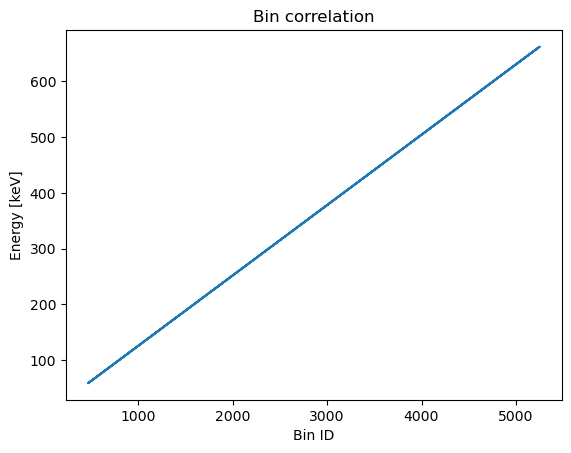

In [17]:
plt.plot(bin_arr, energy_arr)
plt.xlabel('Bin ID')
plt.ylabel('Energy [keV]')
plt.title('Bin correlation')